<a href="https://colab.research.google.com/github/mrgodata/Gender/blob/main/upto_genderproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- 이목구비 데이터 셋으로 성별 판별하기
- https://www.kaggle.com/datasets/hb20007/gender-classification

- 목적
    - 성별에 따른 이목구비 차이를 보고싶었다
    - 모델링을 바탕으로 성별 예측이 가능한지 확인하고싶었다
- 적용
    - 시각화 그래프 for 문 사용
    - heatmap으로 변수를 채택하기 전에 예측해보기
    - 변수뽑기 사용, 예측과 비교
    - 모델을 for문 사용하여 돌리고 정확도가 높은것을 선정
- 한계
    - 실제로 주변 사람의 데이터를 넣어 예측이 맞는지 확인했다면 더 완성도가 높았을 것 같다.
    - 변수를 여러 조합으로 채택하여 모델을 돌려보았는데, 그것을 레포트에 추가했다면 더 좋았을 것 같다.
    - 좀 더 자료가 많아서 골격 등을 비교할 수 있다면 좋았을 것 같다(ex눈썹뼈 돌출정도)

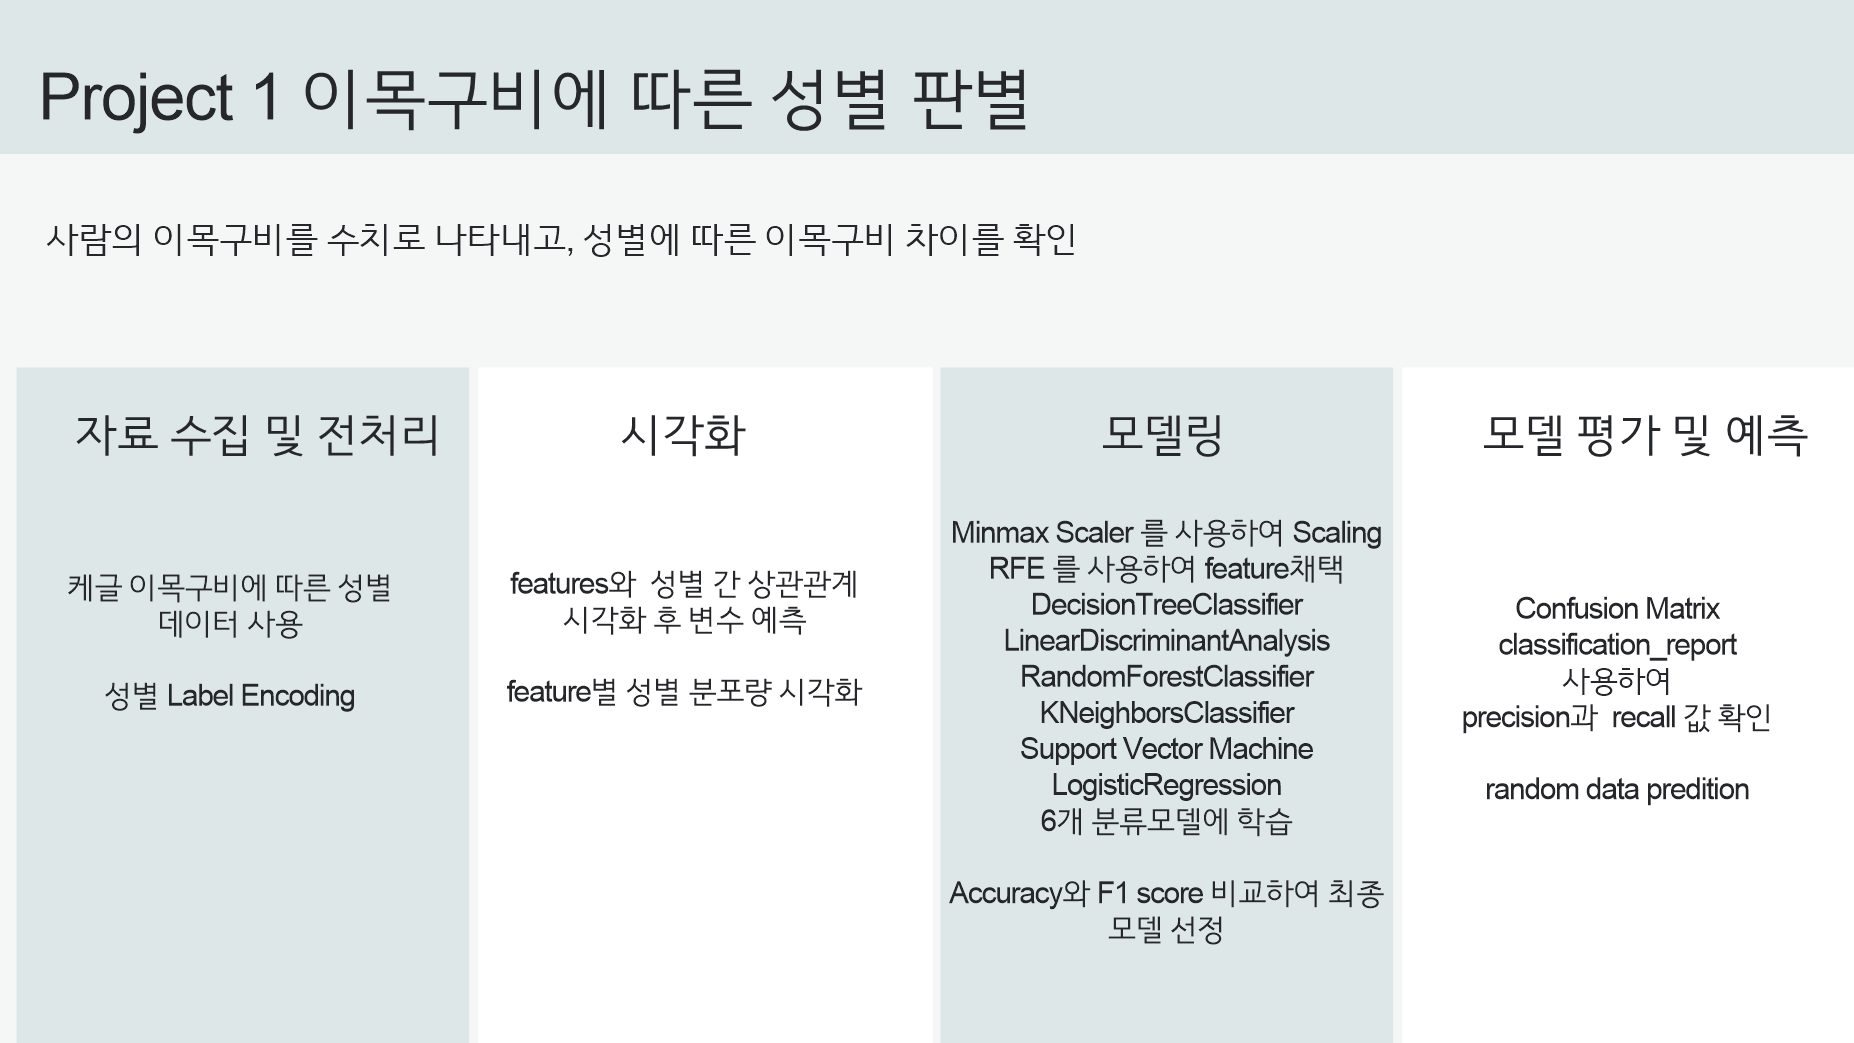

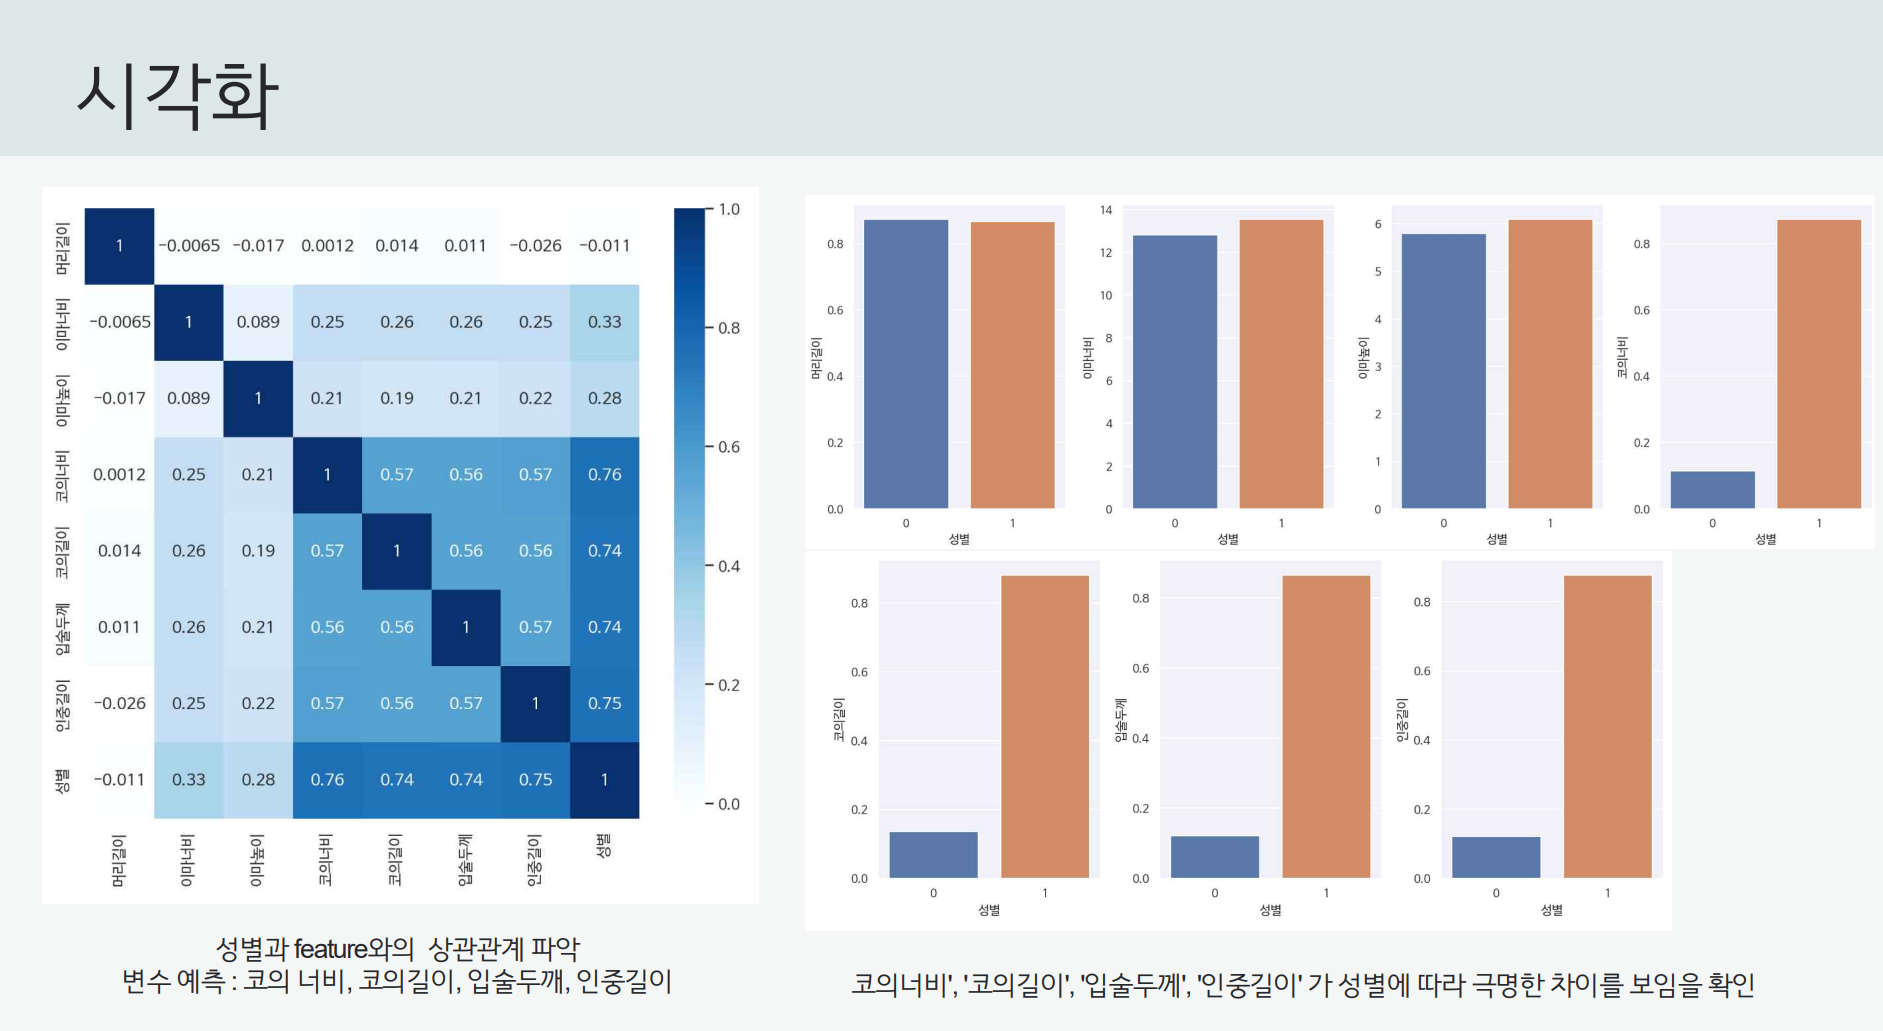

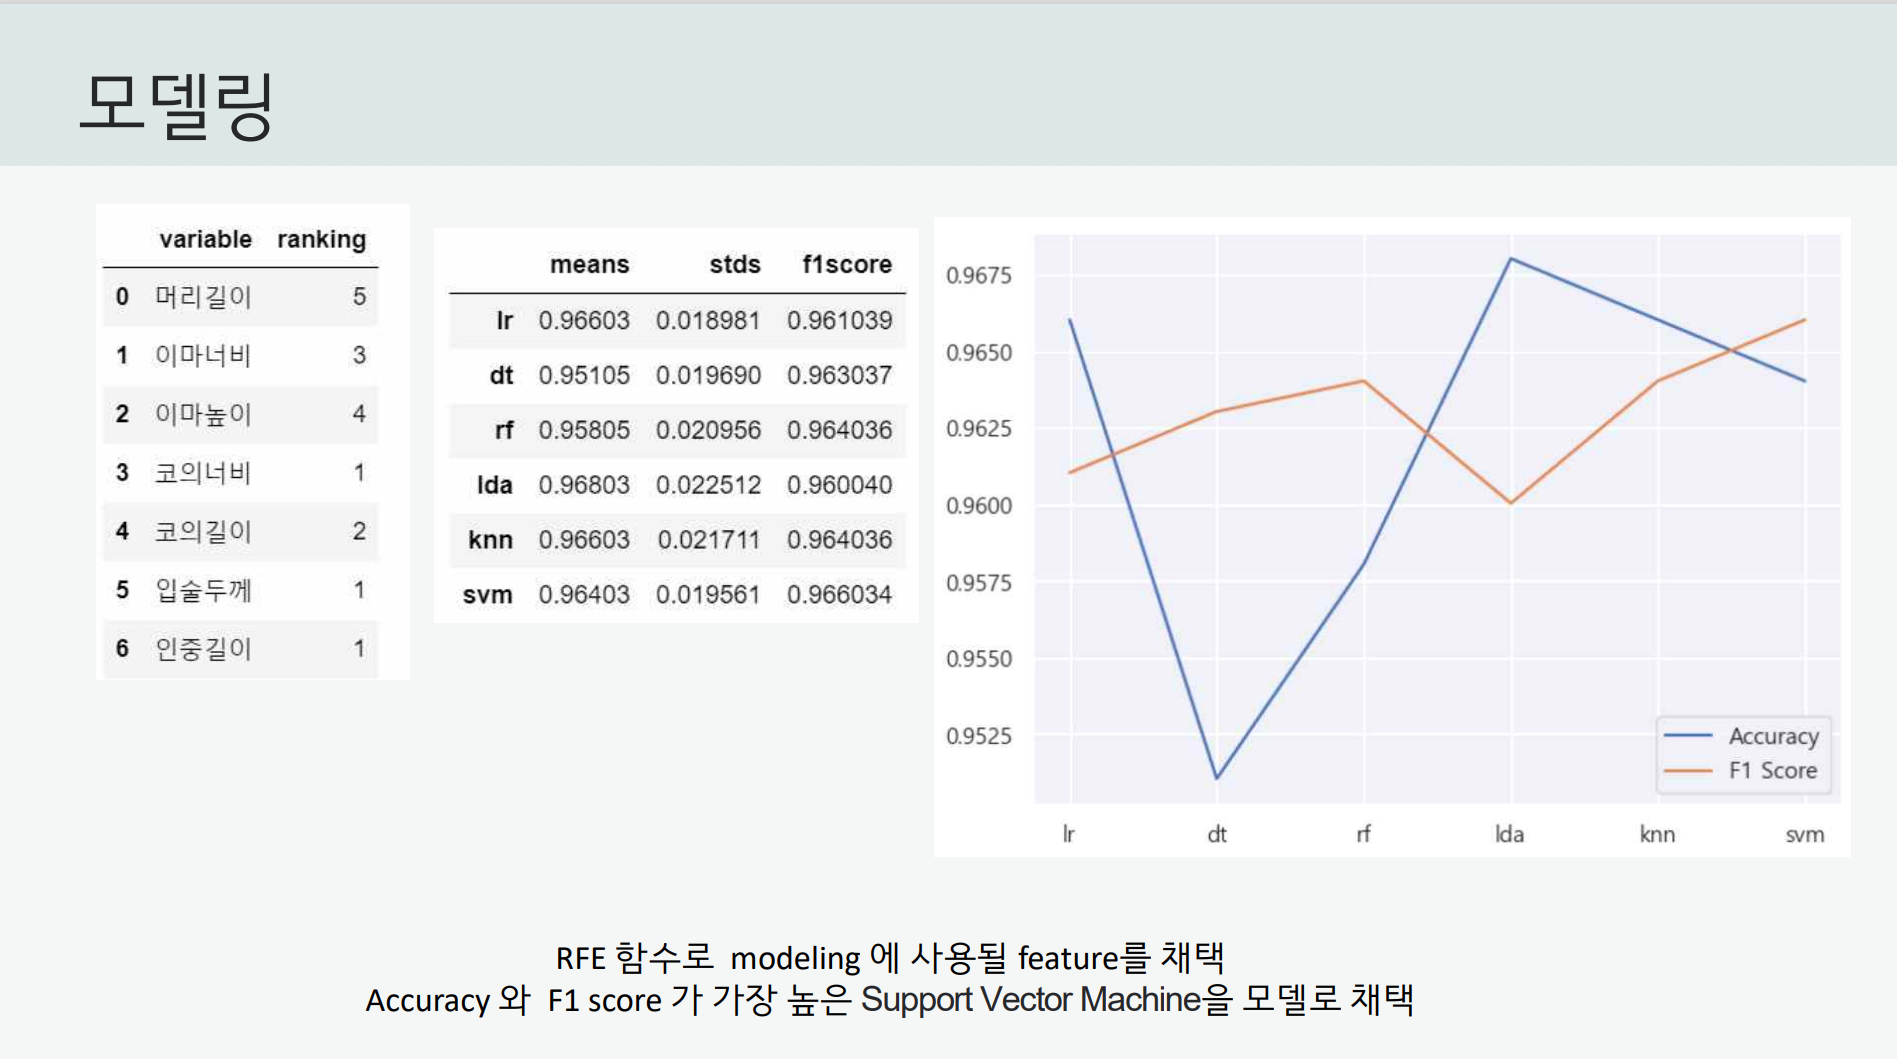

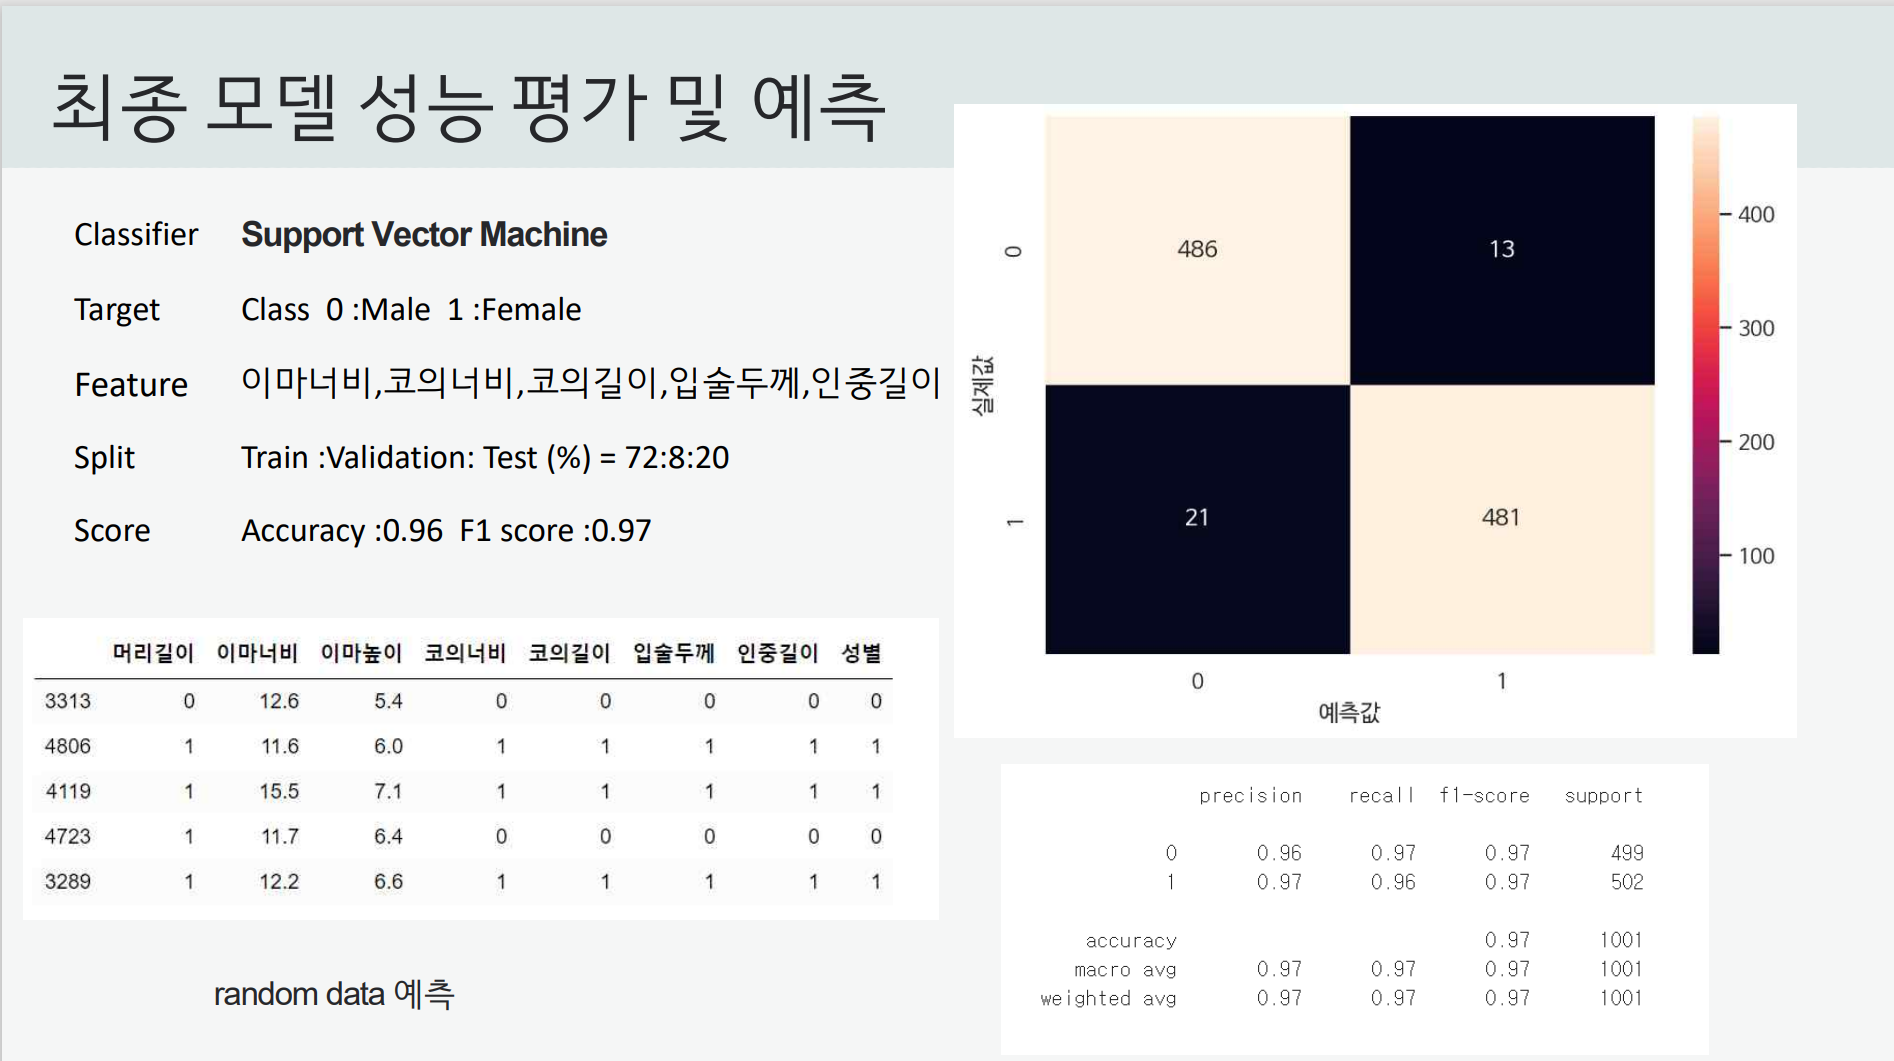

### 1. 라이브러리 임포트

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#sns.set(style='whitegrid')
sns.set(font='Malgun Gothic')


In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### 2. 데이터파악

In [ ]:
df=pd.read_csv('./gender_classification_v7.csv') #같은디렉토리
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
#원본저장
df_origin=df.copy()
df_origin.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
#칼럼이름바꾸기
cols = ['머리길이', '이마너비', '이마높이', '코의너비',
       '코의길이', '입술두께', '인중길이', '성별']
df.columns = cols
df.head(2)

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이,성별
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   머리길이    5001 non-null   int64  
 1   이마너비    5001 non-null   float64
 2   이마높이    5001 non-null   float64
 3   코의너비    5001 non-null   int64  
 4   코의길이    5001 non-null   int64  
 5   입술두께    5001 non-null   int64  
 6   인중길이    5001 non-null   int64  
 7   성별      5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
# resampling 해야 하는지 확인.
df['성별'].value_counts()

Female    2501
Male      2500
Name: 성별, dtype: int64

In [ ]:
df.shape

(5001, 8)

In [ ]:
df.isna().sum()

머리길이    0
이마너비    0
이마높이    0
코의너비    0
코의길이    0
입술두께    0
인중길이    0
성별      0
dtype: int64

In [ ]:
df.describe()

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


### 3. 시각화

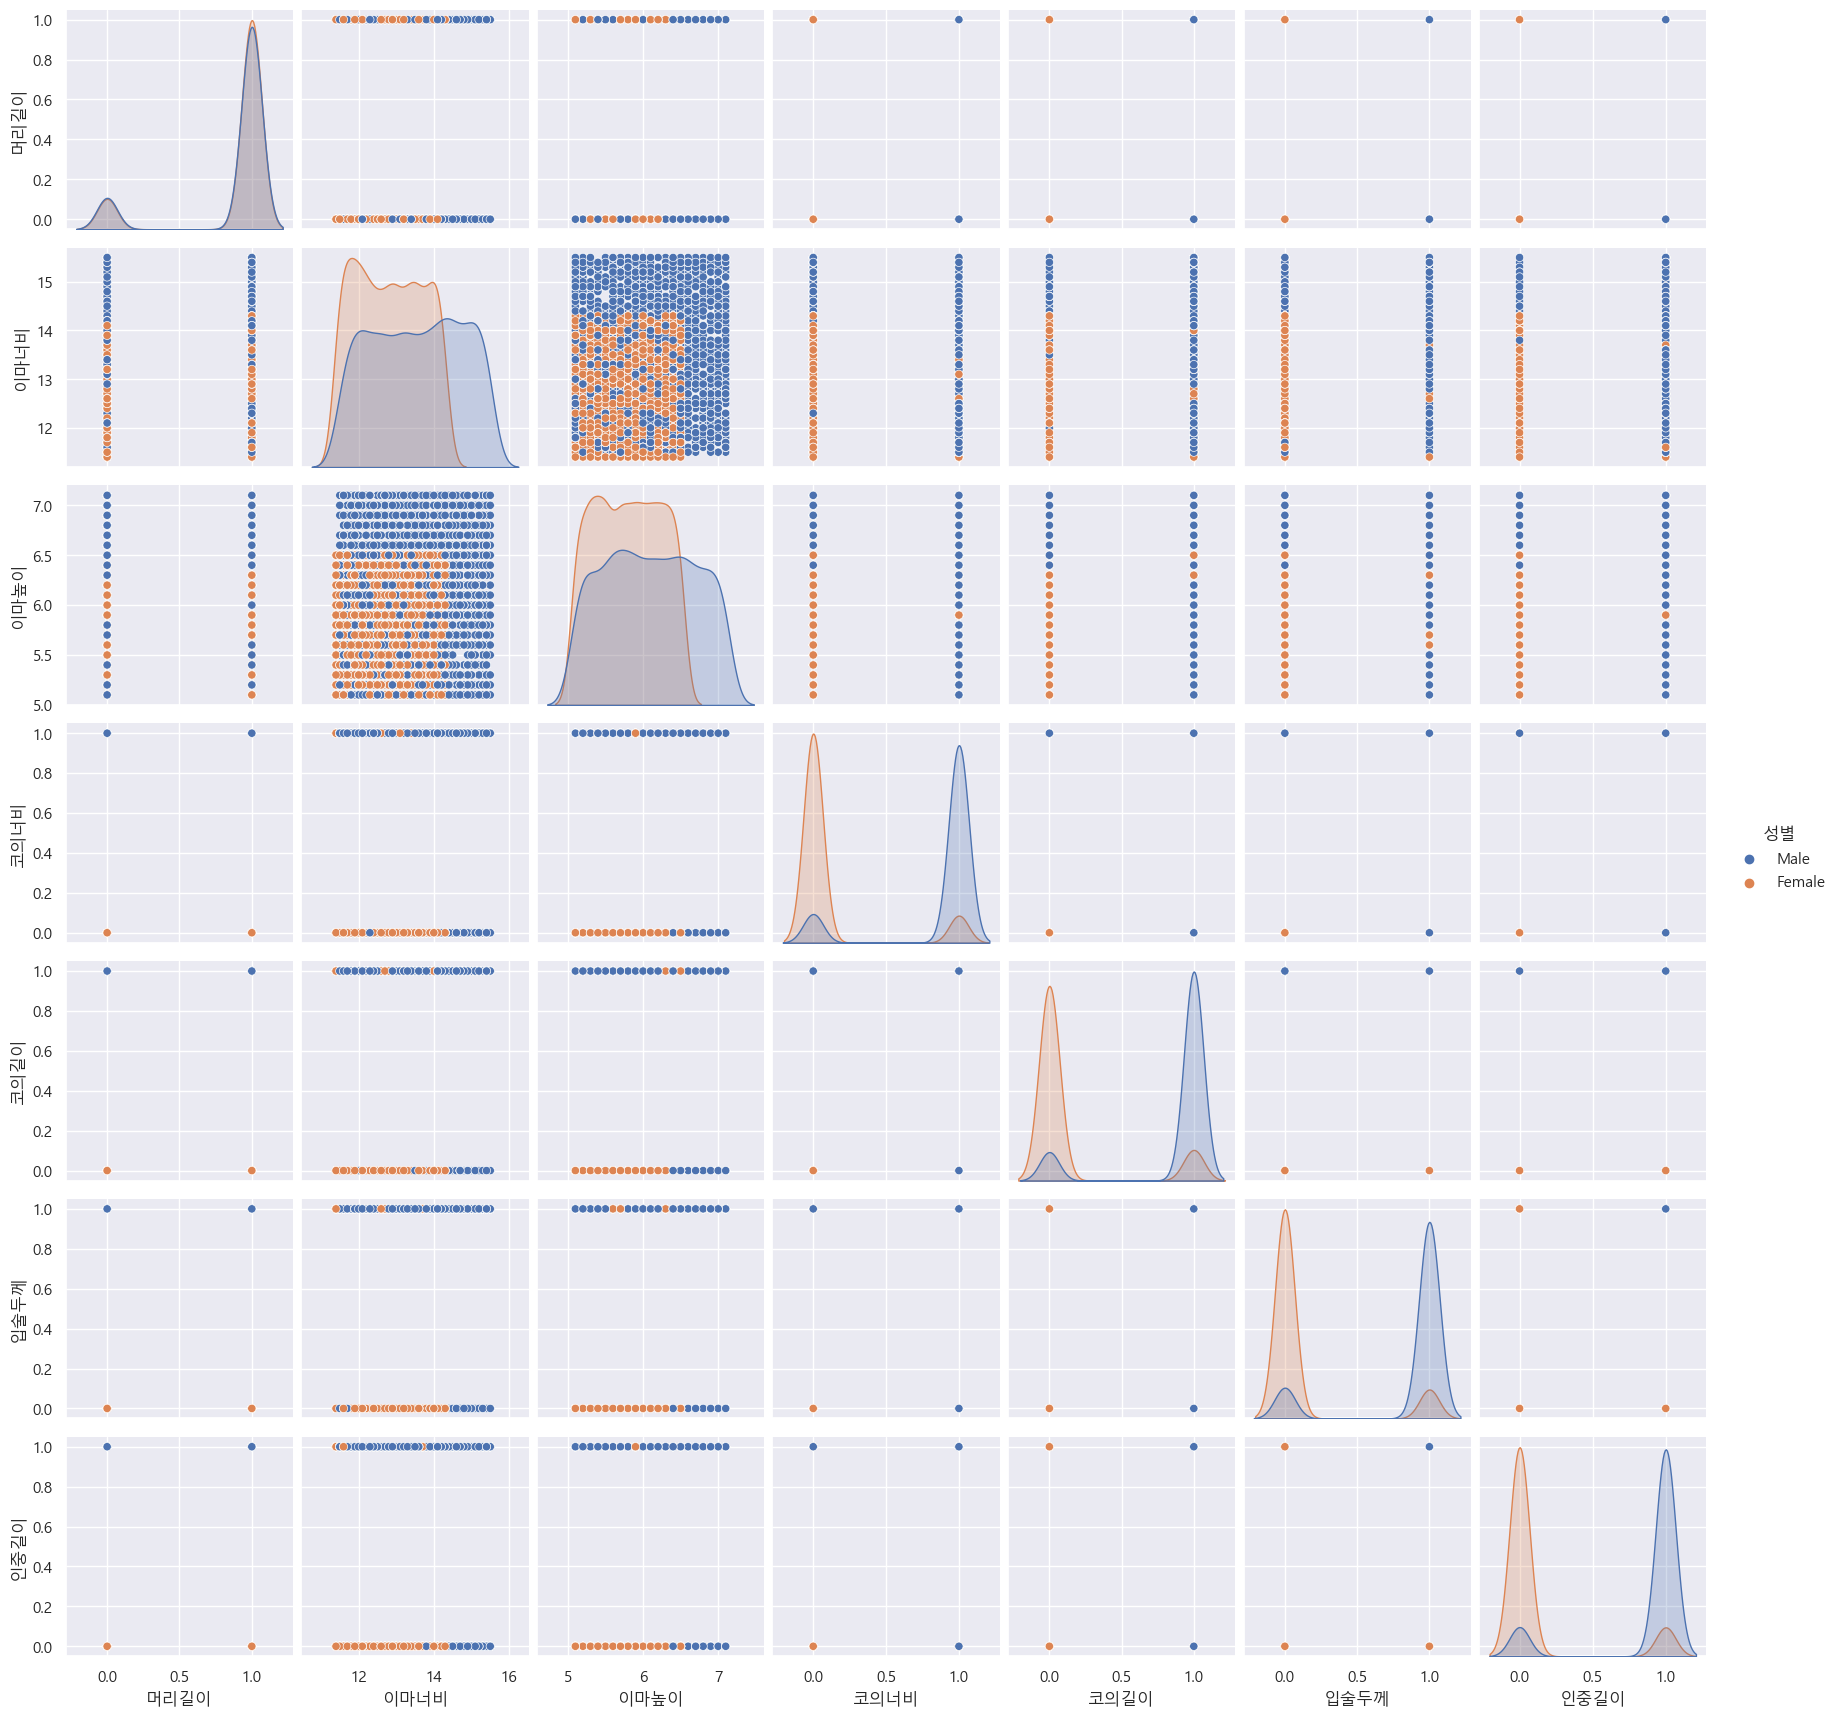

In [ ]:
#pairplot으로 변수들 간 분포 보기
sns.pairplot(df,hue='성별')

In [ ]:
df.corr()

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이
머리길이,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
이마너비,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
이마높이,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
코의너비,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
코의길이,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
입술두께,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
인중길이,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000


In [ ]:
#레이블 인코딩 후 독립변수/종속변수 간 상관관계 파악
#레이블 인코더 Male=1 Female=0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['성별'] = le.fit_transform(df['성별'])

In [ ]:
#레이블 인코더 후 male=1 female=0
df.head()

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이,성별
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


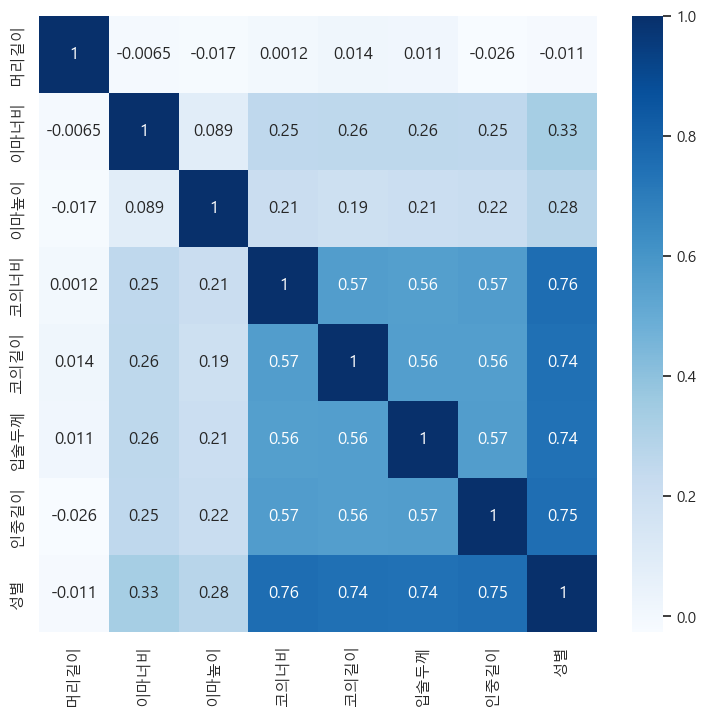

In [ ]:
#히트맵으로 상관관계 파악
#한계:독립변수 간 상관관계가 0.5 이상이다-> 변수 하나로 축소시킬 수 있을 것 같다.
#변수 예측 ->코의 너비, 코의길이, 입술두깨, 인중길이
plt.rcParams['figure.figsize'] = [9, 8] # [width, height] (inches)
hh=sns.heatmap(df.corr(),annot=True,cmap='Blues')
hh.set_ylim(8,0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#성별에 따른 값 비교해주기-groupby
d=df.groupby('성별').mean()#[['long_hair','nose_long']]
d

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이
성별,,,,,,,
0,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
1,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


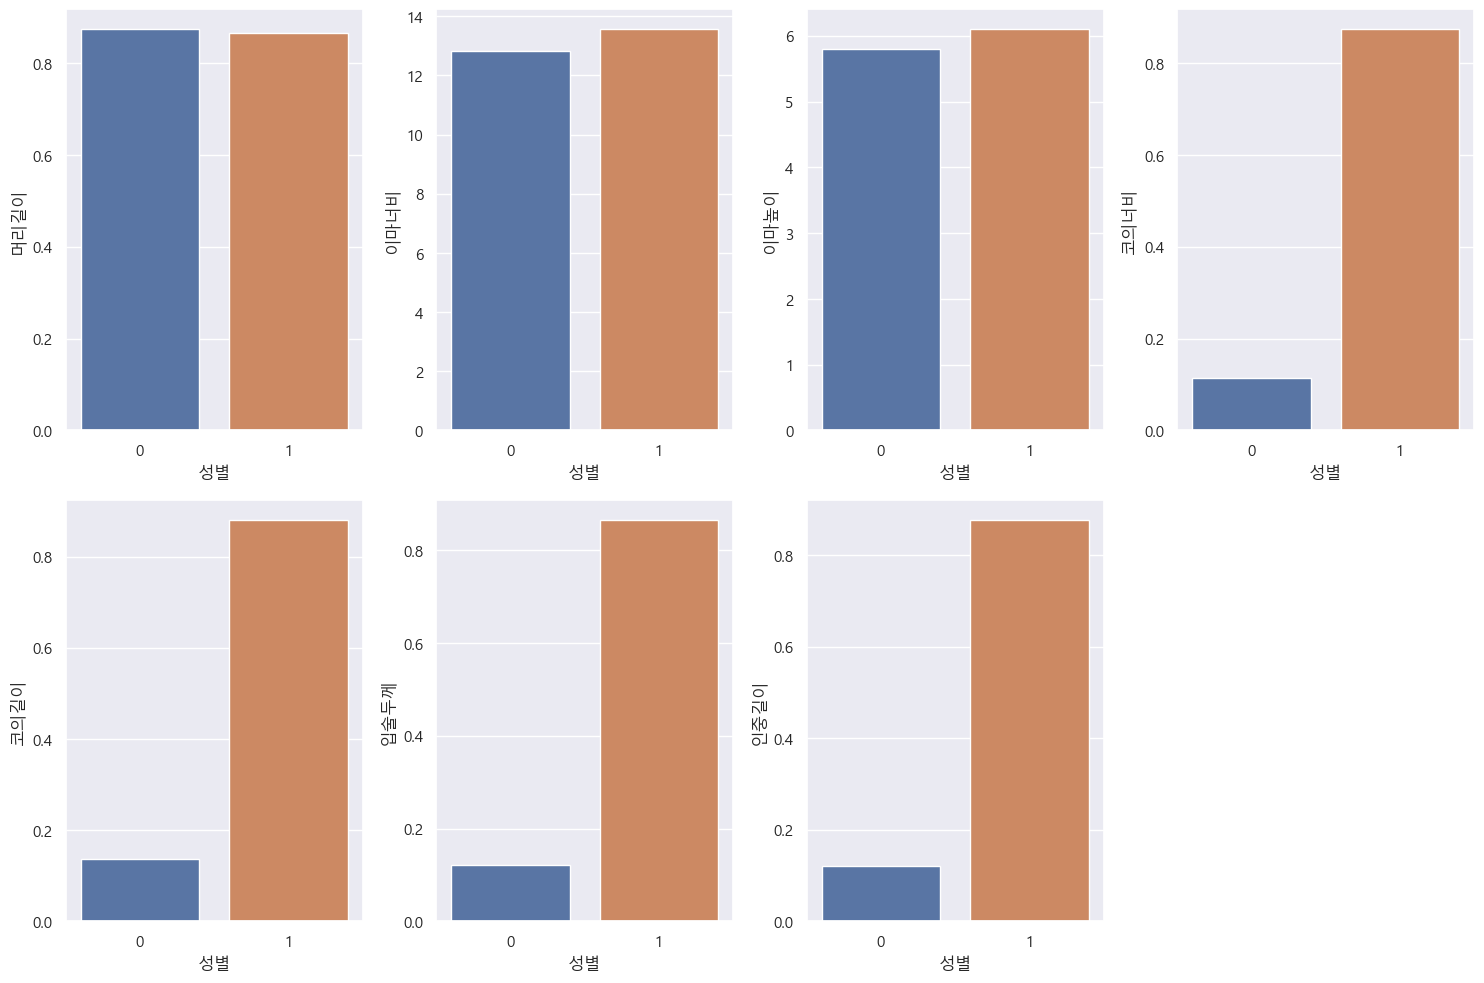

In [ ]:
#for문으로 성별에 따른 막대그래프 표현
# '코의너비', '코의길이', '입술두께', '인중길이' 가 성별에 따라 다름을 확인

plt.figure(figsize = (15, 10))
for i in range (len(d.columns)):

    plt.subplot(2,4,i+1)
    sns.barplot(x=d.index, y=d[d.columns[i]])
plt.tight_layout()
plt.show()


### 4. 모델링 -x와 y값 나누기

In [ ]:
y=df['성별']
x=df.drop('성별',axis=1)

In [ ]:
#민맥스스케일링->변수들 스케일링 통일
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns) #엑스칼럼될까?

In [ ]:
x.head()

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이
0,1.0,0.097561,0.50,1.0,0.0,1.0,1.0
1,0.0,0.634146,0.15,0.0,0.0,1.0,0.0
2,0.0,0.097561,0.60,1.0,1.0,1.0,1.0
3,0.0,0.731707,0.50,0.0,1.0,1.0,1.0
4,1.0,0.512195,0.40,0.0,0.0,0.0,0.0


### 5. 모델링-변수 채택하기

Num Features: 3
Selected Features: [False False False  True False  True  True]
Feature Ranking: [5 3 4 1 2 1 1]


<Axes: xlabel='variable', ylabel='ranking'>

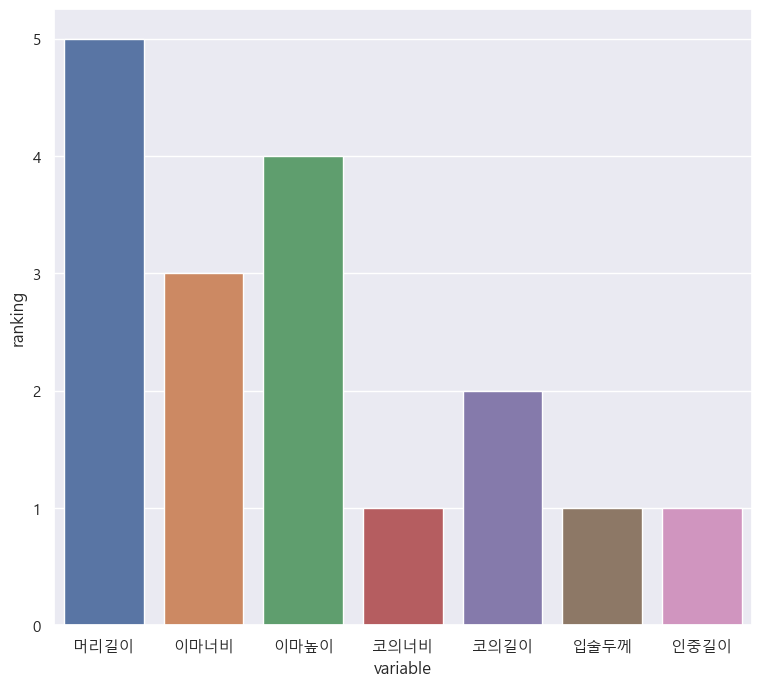

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)#,5) #모델갯수 안써도 됨
fit = rfe.fit(x, y)
print("Num Features: %d" % fit.n_features_) #변수의 갯수
print("Selected Features: %s" % fit.support_) #선택된 변수, 참거짓 값으로 출력
print("Feature Ranking: %s" % fit.ranking_) #변수의 순위

rank = pd.DataFrame({
    'variable': x.columns,
    'ranking': fit.ranking_})
rank.sort_values('ranking')
sns.barplot(x='variable',y='ranking',data=rank)


In [ ]:
rank

,variable,ranking
0,머리길이,5
1,이마너비,3
2,이마높이,4
3,코의너비,1
4,코의길이,2
5,입술두께,1
6,인중길이,1


In [ ]:
#1순위 변수들만 채택하여 모델링
x= x[['이마너비','코의너비', '코의길이', '입술두께', '인중길이']]
x.head()

,이마너비,코의너비,코의길이,입술두께,인중길이
0,0.097561,1.0,0.0,1.0,1.0
1,0.634146,0.0,0.0,1.0,0.0
2,0.097561,1.0,1.0,1.0,1.0
3,0.731707,0.0,1.0,1.0,1.0
4,0.512195,0.0,0.0,0.0,0.0


In [ ]:
#트레인과 테스트 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=2)


In [ ]:
# 정확도 높은 모델 선정: SVM
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),
          LinearDiscriminantAnalysis(),KNeighborsClassifier(),SVC()]
scores = []
cvs = []
m=['lr','dt','rf','lda','knn','svm']
for i, model in enumerate(models):
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
    cvs.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))
cross=pd.DataFrame(cvs,index=m)
#모델 비교
comparison = pd.concat([cross.mean(axis=1), cross.std(axis=1)], axis=1)
comparison.columns = ['means', 'stds']
comparison['f1score']=scores
comparison

,means,stds,f1score
lr,0.96603,0.018981,0.961039
dt,0.95105,0.019690,0.963037
rf,0.95905,0.021811,0.964036
lda,0.96803,0.022512,0.960040
knn,0.96603,0.021711,0.964036
svm,0.96403,0.019561,0.966034


In [ ]:
cross

,0,1,2,3,4,5,6,7,8,9
lr,0.970297,0.98,0.96,0.96,0.98,0.99,0.97,0.92,0.97,0.96
dt,0.950495,0.98,0.94,0.94,0.96,0.96,0.94,0.91,0.96,0.97
rf,0.950495,0.98,0.94,0.96,0.97,0.99,0.94,0.92,0.96,0.98
lda,0.970297,0.98,0.98,0.96,0.98,0.99,0.97,0.91,0.98,0.96
knn,0.970297,0.98,0.96,0.97,0.97,0.99,0.94,0.92,0.99,0.97
svm,0.970297,0.98,0.96,0.96,0.97,0.99,0.95,0.92,0.98,0.96


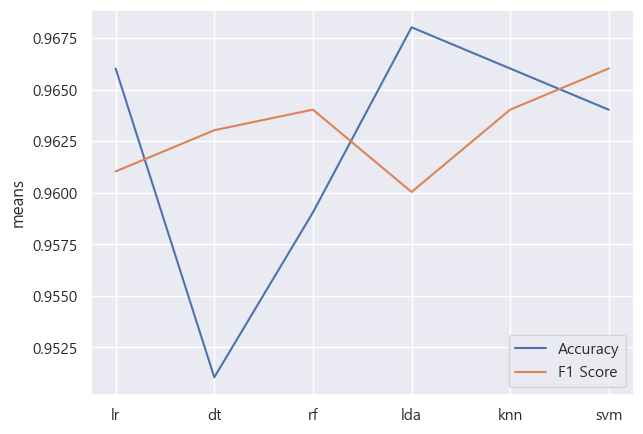

In [ ]:
# fig,ax = plt.subplots(figsize=(7,5))
# sns.lineplot(comparison,x=comparison.index, y = comparison['means'])
# sns.lineplot(comparison,x=comparison.index, y = comparison['f1score'])
# ax.legend()

fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(data=comparison, x=comparison.index, y=comparison['means'], label='Accuracy')
sns.lineplot(data=comparison, x=comparison.index, y=comparison['f1score'], label='F1 Score')
ax.legend()

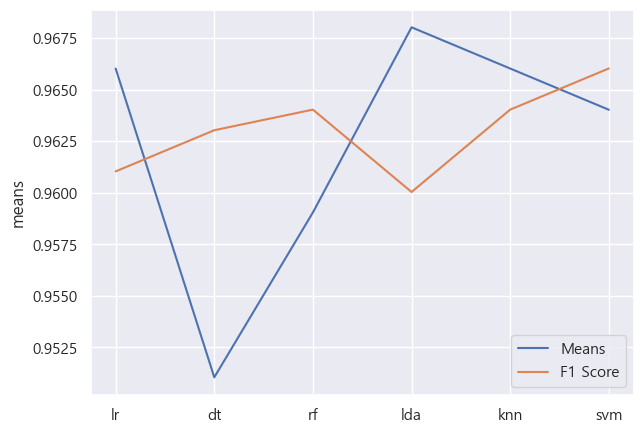

In [ ]:
ig, ax = plt.subplots(figsize=(7, 5))

# 선 그래프 그리기
sns.lineplot(data=comparison, x=comparison.index, y=comparison['means'], label='Means')
sns.lineplot(data=comparison, x=comparison.index, y=comparison['f1score'], label='F1 Score')

# x축 값에 대한 텍스트 표시
#for i, value in enumerate(comparison['svm']):
#ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')
#########################ax.text('value', ha='center', va='bottom') 얘만 해도 안되구 근데 할수있어 주말에 보자 자유자재로 그래프

# x축 값에 대한 동그라미 그리기
#for i, value in enumerate(comparison['svm']):
#    ax.annotate(f'{value:.2f}', (i, value), ha='center', va='bottom')
#    circle = patches.Circle((i, value), radius=0.03, color='red', fill=True)
#    ax.add_patch(circle)
####################ax.annotate('444', ha='center', va='bottom') 얘만 해도 안되네
# 범례 추가
ax.legend()

plt.show()

### 6. 평가-혼동행렬, 분류리포트

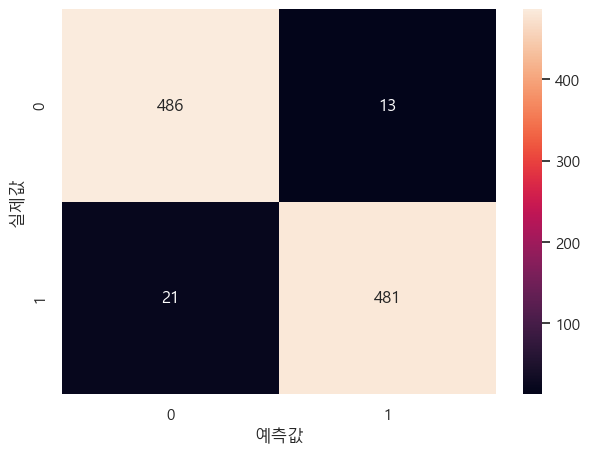

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       499
           1       0.97      0.96      0.97       502

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [ ]:
#혼동행렬
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)
cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy')
    #hd=sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True,fmt='g')

plt.rcParams['figure.figsize'] = [7, 5] # [width, height] (inches)
hd=sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True,fmt='g')
hd.set_ylim(2,0)
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()
#분류리포트
print(classification_report(y_test, model.predict(x_test)))

### 7. 예측해보기

In [ ]:
a=df.sample(5)
a

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이,성별
2730,1,11.4,5.6,0,0,0,0,0
1848,1,11.8,6.8,1,1,1,1,1
4321,1,12.3,6.1,0,0,0,1,0
4615,1,12.6,5.4,1,1,1,1,1
1103,1,11.9,5.5,0,0,0,0,0


In [ ]:
a.index

Int64Index([2730, 1848, 4321, 4615, 1103], dtype='int64')

In [ ]:
#예측 하나만 해보기
test_data=x.iloc[4380,:].values.reshape(1,-1)
model.predict(test_data)


array([1])

In [ ]:
#예측 비교하기 a['예측']=리스트
lst=[]
for i in a.index:
    p=model.predict(x.iloc[i,:].values.reshape(1,-1))
    lst.extend(p)
    print(p)
print(lst)


[0]
[1]
[0]
[1]
[0]
[0, 1, 0, 1, 0]


In [ ]:
#예측값 확인
a['예측']=lst
a

,머리길이,이마너비,이마높이,코의너비,코의길이,입술두께,인중길이,성별,예측
2730,1,11.4,5.6,0,0,0,0,0,0
1848,1,11.8,6.8,1,1,1,1,1,1
4321,1,12.3,6.1,0,0,0,1,0,0
4615,1,12.6,5.4,1,1,1,1,1,1
1103,1,11.9,5.5,0,0,0,0,0,0
